## TDB10224 - prestiti vivi
Prestiti (esclusi PCT e sofferenze) - per provincia, settore e attività economica della clientela

In [5]:
from sqlalchemy import create_engine
import pandas as pd, sqlite3, requests
from io import BytesIO
pd.set_option('display.max_rows', None)
pd.options.display.float_format = "{:,.0f}".format

In [ ]:
import pandas as pd, requests
from io import BytesIO
tabella = 'TDB10224'
file = f'https://a2a.bancaditalia.it/infostat/dataservices/export/IT/CSV/DATA/CUBE/BANKITALIA/DIFF/{tabella}'
result = requests.get(file)
date_column = ['DATA_OSS']
data = pd.read_csv(BytesIO(result.content),compression='zip', header=0, sep=';', quotechar='"', encoding='utf-8',dtype={'ENTE_SEGN':'str', 'FENEC':'str', 'VALORE':'Int32','LOC_SPORT':'Int32'},parse_dates=date_column, dayfirst=False)
data['DATA_OSS'] = pd.to_datetime(data['DATA_OSS'])# .dt.date

In [7]:
print(data.head().to_markdown(index = False))

|   ATECO_CTP | DATA_OSS            |   ENTE_SEGN |    FENEC | LOC_CTP   | SET_CTP   |   VALORE |   STATUS |
|------------:|:--------------------|------------:|---------:|:----------|:----------|---------:|---------:|
|     1005009 | 2025-04-30 00:00:00 |     1070001 | 52000139 | ITF12     | SBI42     |  5282358 |      nan |
|     1005009 | 2025-04-30 00:00:00 |     1070001 | 52000139 | ITG16     | SBI42     |  1145793 |      nan |
|     1004999 | 2025-04-30 00:00:00 |     1070001 | 52000139 | ITI1A     | SBI25     |  2249330 |      nan |
|     1004999 | 2025-04-30 00:00:00 |     1070001 | 52000139 | ITF43     | SBI25     |  2279697 |      nan |
|     1005001 | 2025-04-30 00:00:00 |     1070001 | 52000139 | ITF64     | SBI25     |    84385 |      nan |


In [8]:
for col in data.columns:
    print(f"{col}:")
    print(data[col].unique())
    print()  # riga vuota per separazione


ATECO_CTP:
['1005009' '1004999' '1005001' 'F' '1005003']

DATA_OSS:
<DatetimeArray>
['2025-04-30 00:00:00', '2025-03-31 00:00:00', '2025-02-28 00:00:00',
 '2025-01-31 00:00:00', '2024-12-31 00:00:00', '2024-11-30 00:00:00',
 '2024-10-31 00:00:00', '2024-09-30 00:00:00', '2024-08-31 00:00:00',
 '2024-07-31 00:00:00',
 ...
 '2011-03-31 00:00:00', '2011-02-28 00:00:00', '2011-01-31 00:00:00',
 '2010-12-31 00:00:00', '2010-11-30 00:00:00', '2010-10-31 00:00:00',
 '2010-09-30 00:00:00', '2010-08-31 00:00:00', '2010-07-31 00:00:00',
 '2010-06-30 00:00:00']
Length: 179, dtype: datetime64[ns]

ENTE_SEGN:
['1070001' '1100010']

FENEC:
['52000139']

LOC_CTP:
['ITF12' 'ITG16' 'ITI1A' 'ITF43' 'ITF64' 'ITG12' 'ITG2G' 'ITI15' 'ITC33'
 'ITH51' 'ITI17' 'ITH34' 'ITF13' 'ITF3' 'ITH20' 'ITI44' 'ITG11' 'ITH55'
 'IT' 'ITC16' 'ITG14' 'ITG19' 'ITC11' 'ITI3' 'ITG2' 'ITC15' 'ITH33'
 'ITI18' 'ITF22' 'ITC48' 'ITH' 'ITG15' 'ITI' 'ITC32' 'ITF35' 'ITC43'
 'ITI32' 'ITI11' 'ITC1' 'ITH59' 'ITC20' 'ITI34' 'ITC42' 'ITHB

In [9]:
for col in data.columns:
    unici = sorted(data[col].dropna().unique())
    print(f"{col} ({len(unici)} valori unici): {unici}\n")

ATECO_CTP (5 valori unici): ['1004999', '1005001', '1005003', '1005009', 'F']

DATA_OSS (179 valori unici): [Timestamp('2010-06-30 00:00:00'), Timestamp('2010-07-31 00:00:00'), Timestamp('2010-08-31 00:00:00'), Timestamp('2010-09-30 00:00:00'), Timestamp('2010-10-31 00:00:00'), Timestamp('2010-11-30 00:00:00'), Timestamp('2010-12-31 00:00:00'), Timestamp('2011-01-31 00:00:00'), Timestamp('2011-02-28 00:00:00'), Timestamp('2011-03-31 00:00:00'), Timestamp('2011-04-30 00:00:00'), Timestamp('2011-05-31 00:00:00'), Timestamp('2011-06-30 00:00:00'), Timestamp('2011-07-31 00:00:00'), Timestamp('2011-08-31 00:00:00'), Timestamp('2011-09-30 00:00:00'), Timestamp('2011-10-31 00:00:00'), Timestamp('2011-11-30 00:00:00'), Timestamp('2011-12-31 00:00:00'), Timestamp('2012-01-31 00:00:00'), Timestamp('2012-02-29 00:00:00'), Timestamp('2012-03-31 00:00:00'), Timestamp('2012-04-30 00:00:00'), Timestamp('2012-05-31 00:00:00'), Timestamp('2012-06-30 00:00:00'), Timestamp('2012-07-31 00:00:00'), Timesta

In [29]:
area_periodo = data[
    (data['LOC_CTP'].isin(["ITI1"])) &
    #(data['DATA_OSS'] > pd.Timestamp("2016-12-31")) &
    #(data['DATA_OSS'].dt.month == 12) &
    (data['ENTE_SEGN'].isin(["1070001"])) &
    (data['SET_CTP'].isin(["SBI42"]))
]
area_periodo

,ATECO_CTP,DATA_OSS,ENTE_SEGN,FENEC,LOC_CTP,SET_CTP,VALORE,STATUS
329,1005009,2025-03-31,1070001,52000139,ITI1,SBI42,90777828,NaN
1059,1005009,2025-02-28,1070001,52000139,ITI1,SBI42,90227230,NaN
1790,1005009,2025-01-31,1070001,52000139,ITI1,SBI42,90124401,NaN
2517,1005009,2024-12-31,1070001,52000139,ITI1,SBI42,89935505,NaN
3048,1005009,2024-11-30,1070001,52000139,ITI1,SBI42,90130897,NaN
3424,1005009,2024-10-31,1070001,52000139,ITI1,SBI42,89921858,NaN
4076,1005009,2024-09-30,1070001,52000139,ITI1,SBI42,90062320,NaN
4763,1005009,2024-08-31,1070001,52000139,ITI1,SBI42,89836382,NaN
5873,1005009,2024-07-31,1070001,52000139,ITI1,SBI42,90351432,NaN
6580,1005009,2024-06-30,1070001,52000139,ITI1,SBI42,90656691,NaN


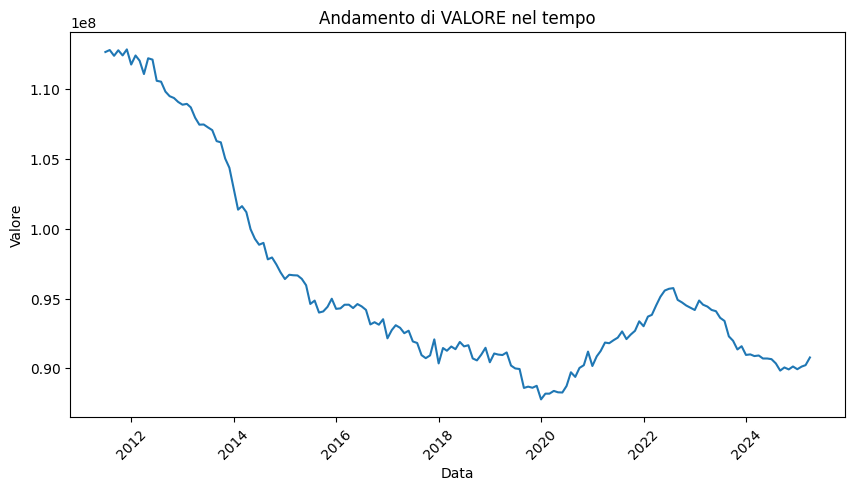

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creazione del grafico con Seaborn
plt.figure(figsize=(10, 5))  # Dimensione della figura
ax = sns.lineplot(x="DATA_OSS", y="VALORE", data=area_periodo)

# ax.set_ylim(8500000, None)  # 0 come minimo, None permette un massimo automatico

# Miglioramenti opzionali
plt.xticks(rotation=45)  # Ruota le date sull'asse X per una migliore leggibilità
plt.title("Andamento di VALORE nel tempo")  # Titolo
plt.xlabel("Data")  # Etichetta asse X
plt.ylabel("Valore")  # Etichetta asse Y

# Mostra il grafico
plt.show()


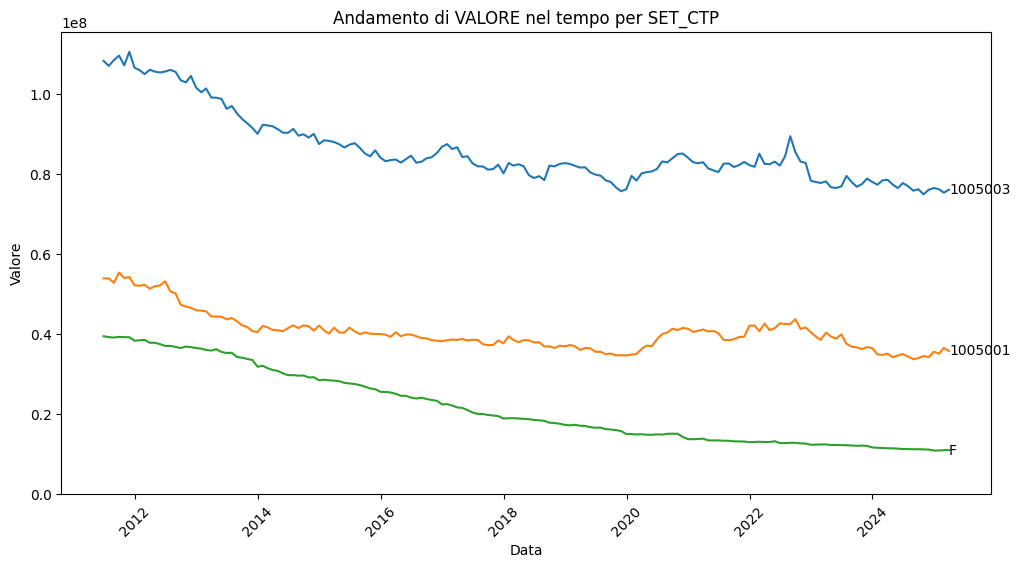

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creazione del grafico
plt.figure(figsize=(12, 6))

# Disegna le linee per ogni categoria di SET_CTP
ax = sns.lineplot(x="DATA_OSS", y="VALORE", hue="ATECO_CTP", data=area_periodo,  legend=False)

# Aggiunge etichette direttamente alla fine delle linee
for line, name in zip(ax.lines, area_periodo['ATECO_CTP'].unique()):
    y = line.get_ydata()[-1]  # Prende l'ultimo valore Y della linea
    x = line.get_xdata()[-1]  # Prende l'ultimo valore X della linea
    plt.text(x, y, name, fontsize=10, verticalalignment='center')  # Scrive l'etichetta vicino alla linea

# Imposta i limiti dell'asse Y
ax.set_ylim(0, None)

# Miglioramenti di leggibilità
plt.xticks(rotation=45)  # Ruota le date
plt.title("Andamento di VALORE nel tempo per SET_CTP")
plt.xlabel("Data")
plt.ylabel("Valore")

plt.show()


In [45]:
import altair as alt

selector = alt.selection_single(fields=['ATECO_CTP'], bind='legend')

chart = alt.Chart(area_periodo).mark_bar().encode(
    x='ENTE_SEGN:N',
    y='VALORE:Q',
    color='ATECO_CTP:N',
    tooltip=['ENTE_SEGN', 'VALORE', 'ATECO_CTP']
).add_selection(selector).transform_filter(selector)

chart.show()


<positron-console-cell-45>:3: AltairDeprecationWarning:


Deprecated since `altair=5.0.0`. Use selection_point instead.

<positron-console-cell-45>:10: AltairDeprecationWarning:


Deprecated since `altair=5.0.0`. Use add_params instead.



alt.Chart(...)

In [46]:
import dash
from dash import dcc, html
import plotly.express as px

app = dash.Dash(__name__)
fig = px.bar(area_periodo, x="ATECO_CTP", y="VALORE", color="ENTE_SEGN")

app.layout = html.Div([
    dcc.Graph(figure=fig)
])

if __name__ == "__main__":
    app.run_server(debug=True)


In [47]:
import streamlit as st
import plotly.express as px

filtro = st.selectbox("Scegli ATECO", area_periodo["ATECO_CTP"].unique())
df_filtrato = area_periodo[area_periodo["ATECO_CTP"] == filtro]
fig = px.bar(df_filtrato, x="ENTE_SEGN", y="VALORE", color="ENTE_SEGN")
st.plotly_chart(fig)


2025-06-26 14:18:42.455 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 14:18:42.455 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 14:18:42.455 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 14:18:42.455 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 14:18:42.455 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2025-06-26 14:18:42.465 WARNING streamlit.runtime.scriptrunner_utils.script_run_c

DeltaGenerator()